Dane: 10000 próbek, 2 wymiary.

Środek danych: [1.01052871 0.74886015]
Macierz kowariancji:
[[ 1.4646667  -1.04762048]
 [-1.04762048  3.58327652]]
Wartości własne: [4.01381576 1.03412747]
Wektory własne (PC1, PC2):
[[-0.3801202 -0.9249371]
 [ 0.9249371 -0.3801202]]
Kąt obrotu (PC1 vs X): 112.3411 stopni


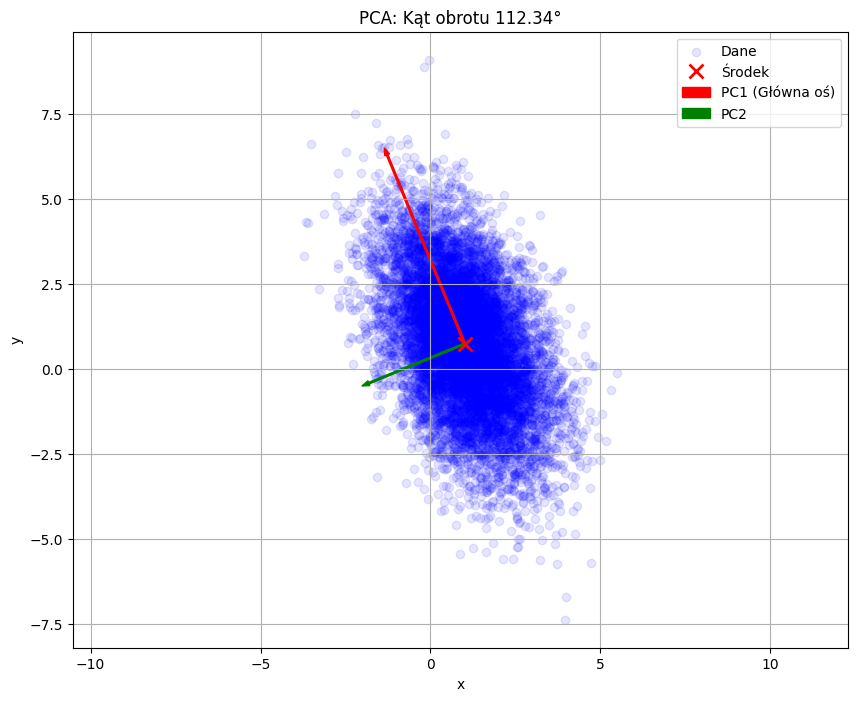

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


filename = '8.csv'

try:
    df = pd.read_csv(filename, header=None, sep=',')
    X = df.values

    if X.shape[0] < X.shape[1]:
        X = X.T

    n, m = X.shape
    print(f"Dane: {n} próbek, {m} wymiary.")

except FileNotFoundError:
    print(f"Błąd: Brak pliku {filename}")
    raise


# 1. Środek ciężkości (wektor średnich)
means = np.mean(X, axis=0)

# 2. Centrowanie danych
B = X - means

# 3. Macierz kowariancji (unbiased)
C = (1 / (n - 1)) * (B.T @ B)

# 4. Dekompozycja własna
# eigh dla macierzy symetrycznych
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Sortowanie malejąco
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# KĄT
# Obliczenie kąta pierwszej osi głównej (PC1) względem osi X
pc1 = eigenvectors[:, 0]
angle_rad = np.arctan2(pc1[1], pc1[0])
angle_deg = np.degrees(angle_rad)

# WYNIKI
print(f"\nŚrodek danych: {means}")
print(f"Macierz kowariancji:\n{C}")
print(f"Wartości własne: {eigenvalues}")
print(f"Wektory własne (PC1, PC2):\n{eigenvectors}")
print(f"Kąt obrotu (PC1 vs X): {angle_deg:.4f} stopni")

# WIZUALIZACJA
plt.figure(figsize=(10, 8))

# Dane wycentrowane (opcjonalnie można rysować oryginalne X)
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.1, label='Dane')

# Środek
plt.plot(means[0], means[1], 'rx', markersize=10, markeredgewidth=2, label='Środek')

# Osie główne
scale = np.sqrt(eigenvalues[0]) * 3
# PC1
plt.arrow(means[0], means[1], pc1[0]*scale, pc1[1]*scale,
          color='red', width=0.05, label='PC1 (Główna oś)')
# PC2
pc2 = eigenvectors[:, 1]
scale2 = np.sqrt(eigenvalues[1]) * 3
plt.arrow(means[0], means[1], pc2[0]*scale2, pc2[1]*scale2,
          color='green', width=0.05, label='PC2')

plt.title(f'PCA: Kąt obrotu {angle_deg:.2f}°')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()